Assignment Instructions:
1. Use different nonlinearities, sigmoid, ReLu, tanh etc. If 2.0 has Swish and other newer options, try those.

2. Use different learning rates (lr), then bespoke lr schedules by making a function to drop values and taking a product with the initial lr. Use lr schedulers from various git contributions you find - cos, cyclic. Also increase lr and see what happens. Test everything on the val set.

3. Add gradient clipping, L1 and L2 (weight decay) regularisations. Report on error and accuracy. Also apply batch normalisation, layer normalisation etc. Report on error, (training) accuracy and validation accuracy.

4. Use grid search (from sklearn, GridSearchCV) to tune several hyperparameters together. Report on train error, accuracy, and val accuracy. Ã‚Â

5. Mix train and test sets from MNIST/CIFAR100. Make a 5-fold cross validation function, or use a library. Compare numbers with the base line held-out model (if your k-F CV model is also baseline - no fancy hyperparameters). Ã‚Â

6. Save and load parameters /weights at the end of training. Again do so at multiple checkpoints. Average them out for an ensemble decision and report how representative it is of all individual runs.Ã‚Â




##**Step no 1:**
###Experimentation with Activation Functions:
1) RELU <br>
2) Sigmoid <br>
3) Tanh <br>
4) ELU <br>

Values of other Parameters:<br>
Learning rate= 0.001<br>
Batch size =100<br>
No of Epoch= 12



Epoch [1/12], Step [100/600], Loss: 0.5926
Epoch [1/12], Step [200/600], Loss: 0.1960
Epoch [1/12], Step [300/600], Loss: 0.1544
Epoch [1/12], Step [400/600], Loss: 0.2847
Epoch [1/12], Step [500/600], Loss: 0.1280
Epoch [1/12], Step [600/600], Loss: 0.1654
Epoch [2/12], Step [100/600], Loss: 0.0207
Epoch [2/12], Step [200/600], Loss: 0.1528
Epoch [2/12], Step [300/600], Loss: 0.2654
Epoch [2/12], Step [400/600], Loss: 0.0702
Epoch [2/12], Step [500/600], Loss: 0.0948
Epoch [2/12], Step [600/600], Loss: 0.1487
Epoch [3/12], Step [100/600], Loss: 0.0362
Epoch [3/12], Step [200/600], Loss: 0.0959
Epoch [3/12], Step [300/600], Loss: 0.0953
Epoch [3/12], Step [400/600], Loss: 0.0454
Epoch [3/12], Step [500/600], Loss: 0.0239
Epoch [3/12], Step [600/600], Loss: 0.1626
Epoch [4/12], Step [100/600], Loss: 0.0395
Epoch [4/12], Step [200/600], Loss: 0.0365
Epoch [4/12], Step [300/600], Loss: 0.0547
Epoch [4/12], Step [400/600], Loss: 0.0551
Epoch [4/12], Step [500/600], Loss: 0.0294
Epoch [4/12

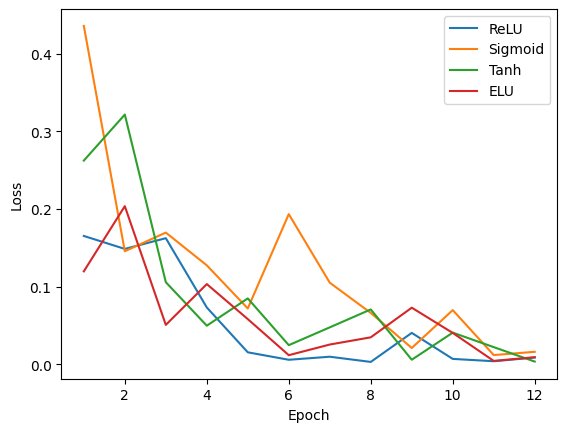


Test Accuracies:
Activation FunctionAccuracy (%)
ReLU           98.01%
Sigmoid        97.85%
Tanh           97.95%
ELU            97.95%


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784  # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 12
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor(),
)

# Data loader
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
)

# Activation functions to test
activation_functions = [nn.ReLU(), nn.Sigmoid(), nn.Tanh(), nn.ELU()]

# Create a list to store the loss for each activation function
losses_list = [[] for _ in activation_functions]
test_accuracies = []

for activation in activation_functions:
    # Fully connected neural network with one hidden layer
    class NeuralNet(nn.Module):
        def __init__(self, input_size, hidden_size, num_classes):
            super(NeuralNet, self).__init__()
            self.l1 = nn.Linear(input_size, hidden_size)
            self.activation = activation  # Use the specified activation
            self.l2 = nn.Linear(hidden_size, num_classes)

        def forward(self, x):
            out = self.l1(x)
            out = self.activation(out)  # Apply the specified activation
            out = self.l2(out)
            return out

    model = NeuralNet(input_size, hidden_size, num_classes).to(device)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    n_total_steps = len(train_loader)
    losses = []

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = images.reshape(-1, 28 * 28).to(device)
            labels = labels.to(device)

            # Forward pass and loss calculation
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            if (i + 1) % 100 == 0:
                print(
                    f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.4f}'
                )

        # Store the loss for the epoch
        losses.append(loss.item())

    # Store the losses for the activation function
    losses_list[activation_functions.index(activation)] = losses

    # Test the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28 * 28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        test_accuracies.append(accuracy)
    model.train()

# Plot the training loss for all activation functions
for i, activation in enumerate(activation_functions):
    plt.plot(range(1, num_epochs + 1), losses_list[i], label=f'{activation.__class__.__name__}')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display the test accuracies in a table
print("\nTest Accuracies:")
print(f"{'Activation Function':<15}{'Accuracy (%)'}")
for i, activation in enumerate(activation_functions):
    print(f"{activation.__class__.__name__:<15}{test_accuracies[i]:.2f}%")


##My Observations for step 1:
RELU and Tanh are working better after observing it from graph.RELU is working even better than Tanh.

##**Step no 2:**
###Experimentation with Learning Rates:
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
**bold text**

Epoch [1/12], Step [100/600], Loss: 0.2676
Epoch [1/12], Step [200/600], Loss: 0.2257
Epoch [1/12], Step [300/600], Loss: 0.2074
Epoch [1/12], Step [400/600], Loss: 0.3198
Epoch [1/12], Step [500/600], Loss: 0.1468
Epoch [1/12], Step [600/600], Loss: 0.2425
Epoch [2/12], Step [100/600], Loss: 0.1284
Epoch [2/12], Step [200/600], Loss: 0.1291
Epoch [2/12], Step [300/600], Loss: 0.0693
Epoch [2/12], Step [400/600], Loss: 0.0966
Epoch [2/12], Step [500/600], Loss: 0.0794
Epoch [2/12], Step [600/600], Loss: 0.1335
Epoch [3/12], Step [100/600], Loss: 0.0748
Epoch [3/12], Step [200/600], Loss: 0.0523
Epoch [3/12], Step [300/600], Loss: 0.1804
Epoch [3/12], Step [400/600], Loss: 0.0466
Epoch [3/12], Step [500/600], Loss: 0.0822
Epoch [3/12], Step [600/600], Loss: 0.1589
Epoch [4/12], Step [100/600], Loss: 0.0389
Epoch [4/12], Step [200/600], Loss: 0.1382
Epoch [4/12], Step [300/600], Loss: 0.0776
Epoch [4/12], Step [400/600], Loss: 0.0211
Epoch [4/12], Step [500/600], Loss: 0.0306
Epoch [4/12

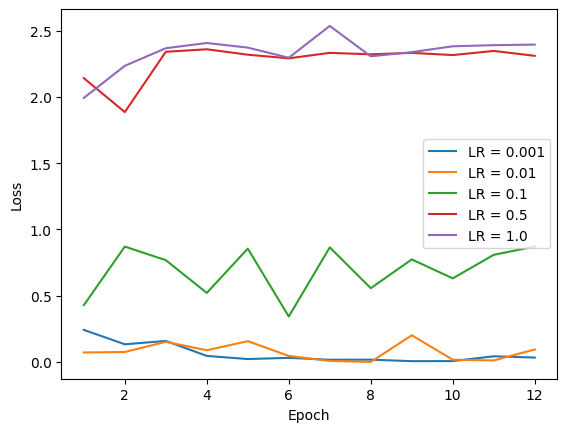


Test Accuracies:
Learning Rate  Accuracy (%)
0.001          97.93%
0.01           96.94%
0.1            76.11%
0.5            10.30%
1.0            10.12%


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784  # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 12
batch_size = 100

# Define a list of different learning rates to test
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor(),
)

# Data loader
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
)

# Create a list to store the loss for each learning rate
losses_list = []
accuracies_list = []  # To store test accuracies

# ReLU activation function
activation = nn.ReLU()

for learning_rate in learning_rates:
    # Fully connected neural network with one hidden layer
    class NeuralNet(nn.Module):
        def __init__(self, input_size, hidden_size, num_classes):
            super(NeuralNet, self).__init__()
            self.l1 = nn.Linear(input_size, hidden_size)
            self.activation = activation  # Use ReLU activation
            self.l2 = nn.Linear(hidden_size, num_classes)

        def forward(self, x):
            out = self.l1(x)
            out = self.activation(out)  # Apply ReLU activation
            out = self.l2(out)
            return out

    model = NeuralNet(input_size, hidden_size, num_classes).to(device)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    n_total_steps = len(train_loader)
    losses = []

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = images.reshape(-1, 28 * 28).to(device)
            labels = labels.to(device)

            # Forward pass and loss calculation
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            if (i + 1) % 100 == 0:
                print(
                    f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.4f}'
                )

        # Store the loss for the epoch
        losses.append(loss.item())

    # Store the losses for the current learning rate
    losses_list.append(losses)

    # Test the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28 * 28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        accuracies_list.append(accuracy)
    model.train()

# Plot the training loss for different learning rates
for i, learning_rate in enumerate(learning_rates):
    plt.plot(
        range(1, num_epochs + 1),
        losses_list[i],
        label=f'LR = {learning_rate}'
    )

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display the test accuracies in a table
print("\nTest Accuracies:")
print(f"{'Learning Rate':<15}{'Accuracy (%)'}")
for i, learning_rate in enumerate(learning_rates):
    print(f"{learning_rate:<15}{accuracies_list[i]:.2f}%")


##Experimentation with learning rates(Schedueler: StepLR)




100%|██████████| 9912422/9912422 [00:00<00:00, 104168970.69it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 66704677.22it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26081955.79it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15968590.75it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch [1/12], Step [100/600], Loss: 0.3383
Epoch [1/12], Step [200/600], Loss: 0.2481
Epoch [1/12], Step [300/600], Loss: 0.2595
Epoch [1/12], Step [400/600], Loss: 0.1887
Epoch [1/12], Step [500/600], Loss: 0.1721
Epoch [1/12], Step [600/600], Loss: 0.0646
Epoch [2/12], Step [100/600], Loss: 0.1554
Epoch [2/12], Step [200/600], Loss: 0.1687
Epoch [2/12], Step [300/600], Loss: 0.0417
Epoch [2/12], Step [400/600], Loss: 0.1749
Epoch [2/12], Step [500/600], Loss: 0.1687
Epoch [2/12], Step [600/600], Loss: 0.1594
Epoch [3/12], Step [100/600], Loss: 0.0821
Epoch [3/12], Step [200/600], Loss: 0.0709
Epoch [3/12], Step [300/600], Loss: 0.0951
Epoch [3/12], Step [400/600], Loss: 0.1168
Epoch [3/12], Step [500/600], Loss: 0.0550
Epoch [3/12], Step [600/600], Loss: 0.0976
Epoch [4/12], Step [100/600], Loss: 0.0326
Epoch [4/12], Step [200/600], Loss: 0.0338
Epoch [4/12], Step [300/600], Loss: 0.0415
Epoch [4/12], Step [400/600], Loss: 0.0866
Epoch [4/12], Step [500/600], Loss: 0.0249
Epoch [4/12

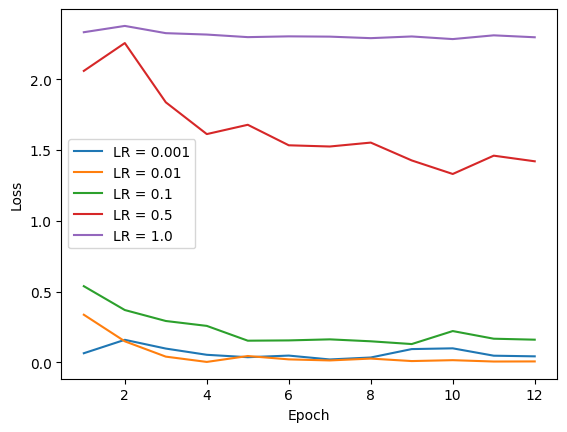


Test Accuracies:
Learning Rate  Accuracy (%)
0.001          97.69%
0.01           98.12%
0.1            94.01%
0.5            42.51%
1.0            11.55%


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, MultiStepLR, ReduceLROnPlateau

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784  # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 12
batch_size = 100

# Define a list of different learning rates to test
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor(),
)

# Data loader
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
)

# Create a list to store the loss for each learning rate
losses_list = []
accuracies_list = []  # To store test accuracies

# ReLU activation function
activation = nn.ReLU()

for learning_rate in learning_rates:
    # Fully connected neural network with one hidden layer
    class NeuralNet(nn.Module):
        def __init__(self, input_size, hidden_size, num_classes):
            super(NeuralNet, self).__init__()
            self.l1 = nn.Linear(input_size, hidden_size)
            self.activation = activation  # Use ReLU activation
            self.l2 = nn.Linear(hidden_size, num_classes)

        def forward(self, x):
            out = self.l1(x)
            out = self.activation(out)  # Apply ReLU activation
            out = self.l2(out)
            return out

    model = NeuralNet(input_size, hidden_size, num_classes).to(device)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Learning rate scheduler
    scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
    # Other options: MultiStepLR, ReduceLROnPlateau

    # Train the model
    n_total_steps = len(train_loader)
    losses = []

    for epoch in range(num_epochs):
        model.train()
        scheduler.step()  # Update the learning rate

        for i, (images, labels) in enumerate(train_loader):
            images = images.reshape(-1, 28 * 28).to(device)
            labels = labels.to(device)

            # Forward pass and loss calculation
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            if (i + 1) % 100 == 0:
                print(
                    f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.4f}'
                )

        # Store the loss for the epoch
        losses.append(loss.item())

    # Store the losses for the current learning rate
    losses_list.append(losses)

    # Test the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28 * 28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        accuracies_list.append(accuracy)
    model.train()

# Plot the training loss for different learning rates
for i, learning_rate in enumerate(learning_rates):
    plt.plot(
        range(1, num_epochs + 1),
        losses_list[i],
        label=f'LR = {learning_rate}'
    )

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display the test accuracies in a table
print("\nTest Accuracies:")
print(f"{'Learning Rate':<15}{'Accuracy (%)'}")
for i, learning_rate in enumerate(learning_rates):
    print(f"{learning_rate:<15}{accuracies_list[i]:.2f}%")


##Experimentation with learning rates(Schedueler: CyclicLR)

For using CyclicLR schedueler, I had to change the optimizer as its not working with Adam.

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch [1/12], Step [100/600], Loss: 0.7243
Epoch [1/12], Step [200/600], Loss: 0.5105
Epoch [1/12], Step [300/600], Loss: 0.3940
Epoch [1/12], Step [400/600], Loss: 0.4273
Epoch [1/12], Step [500/600], Loss: 0.4410
Epoch [1/12], Step [600/600], Loss: 0.2817
Epoch [2/12], Step [100/600], Loss: 0.4077
Epoch [2/12], Step [200/600], Loss: 0.2540
Epoch [2/12], Step [300/600], Loss: 0.2555
Epoch [2/12], Step [400/600], Loss: 0.1559
Epoch [2/12], Step [500/600], Loss: 0.3119
Epoch [2/12], Step [600/600], Loss: 0.2593
Epoch [3/12], Step [100/600], Loss: 0.1372
Epoch [3/12], Step [200/600], Loss: 0.1723
Epoch [3/12], Step [300/600], Loss: 0.1665
Epoch [3/12], Step [400/600], Loss: 0.1270
Epoch [3/12], Step [500/600], Loss: 0.2063
Epoch [3/12], Step [600/600], Loss: 0.1801
Epoch [4/12], Step [100/600], Loss: 0.1341
Epoch [4/12], Step [200/600], Loss: 0.0886
Epoch [4/12], Step [300/600], Loss: 0.1032
Epoch [4/12], Step [400/600], Loss: 0.2348
Epoch [4/12], Step [500/600], Loss: 0.1393
Epoch [4/12

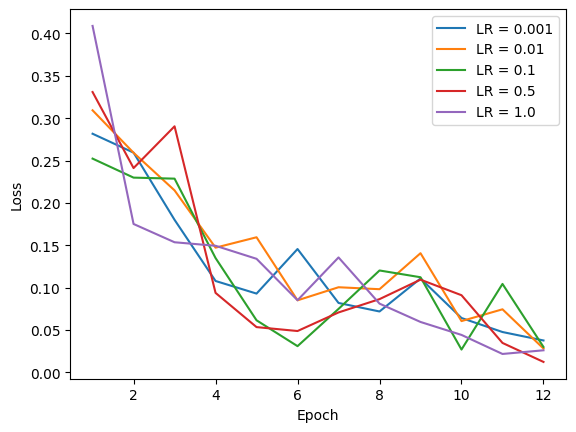


Test Accuracies:
Learning Rate  Accuracy (%)
0.001          97.82%
0.01           97.69%
0.1            97.87%
0.5            97.90%
1.0            97.90%


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.optim.lr_scheduler import CyclicLR

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784  # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 12
batch_size = 100

# Define a list of different learning rates to test
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor(),
)

# Data loader
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
)

# Create a list to store the loss for each learning rate
losses_list = []
accuracies_list = []  # To store test accuracies

# ReLU activation function
activation = nn.ReLU()

for learning_rate in learning_rates:
    # Fully connected neural network with one hidden layer
    class NeuralNet(nn.Module):
        def __init__(self, input_size, hidden_size, num_classes):
            super(NeuralNet, self).__init__()
            self.l1 = nn.Linear(input_size, hidden_size)
            self.activation = activation  # Use ReLU activation
            self.l2 = nn.Linear(hidden_size, num_classes)

        def forward(self, x):
            out = self.l1(x)
            out = self.activation(out)  # Apply ReLU activation
            out = self.l2(out)
            return out

    model = NeuralNet(input_size, hidden_size, num_classes).to(device)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)



    # Learning rate scheduler
    scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.01, max_lr=0.1, step_size_up=100, cycle_momentum=True)



    # Train the model
    n_total_steps = len(train_loader)
    losses = []

    for epoch in range(num_epochs):
        model.train()
        scheduler.step()  # Update the learning rate

        for i, (images, labels) in enumerate(train_loader):
            images = images.reshape(-1, 28 * 28).to(device)
            labels = labels.to(device)

            # Forward pass and loss calculation
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            if (i + 1) % 100 == 0:
                print(
                    f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.4f}'
                )

        # Store the loss for the epoch
        losses.append(loss.item())

    # Store the losses for the current learning rate
    losses_list.append(losses)

    # Test the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28 * 28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        accuracies_list.append(accuracy)
    model.train()

# Plot the training loss for different learning rates
for i, learning_rate in enumerate(learning_rates):
    plt.plot(
        range(1, num_epochs + 1),
        losses_list[i],
        label=f'LR = {learning_rate}'
    )

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display the test accuracies in a table
print("\nTest Accuracies:")
print(f"{'Learning Rate':<15}{'Accuracy (%)'}")
for i, learning_rate in enumerate(learning_rates):
    print(f"{learning_rate:<15}{accuracies_list[i]:.2f}%")


##**Step 3**:
##Experimientation with L2 Regularization

Epoch [1/12], Step [100/600], Loss: 0.4407
Epoch [1/12], Step [200/600], Loss: 0.2221
Epoch [1/12], Step [300/600], Loss: 0.2249
Epoch [1/12], Step [400/600], Loss: 0.2320
Epoch [1/12], Step [500/600], Loss: 0.1887
Epoch [1/12], Step [600/600], Loss: 0.1405
Epoch [2/12], Step [100/600], Loss: 0.3163
Epoch [2/12], Step [200/600], Loss: 0.1517
Epoch [2/12], Step [300/600], Loss: 0.0845
Epoch [2/12], Step [400/600], Loss: 0.1229
Epoch [2/12], Step [500/600], Loss: 0.1237
Epoch [2/12], Step [600/600], Loss: 0.1990
Epoch [3/12], Step [100/600], Loss: 0.1182
Epoch [3/12], Step [200/600], Loss: 0.1498
Epoch [3/12], Step [300/600], Loss: 0.1218
Epoch [3/12], Step [400/600], Loss: 0.0540
Epoch [3/12], Step [500/600], Loss: 0.0776
Epoch [3/12], Step [600/600], Loss: 0.1210
Epoch [4/12], Step [100/600], Loss: 0.1541
Epoch [4/12], Step [200/600], Loss: 0.0470
Epoch [4/12], Step [300/600], Loss: 0.1374
Epoch [4/12], Step [400/600], Loss: 0.1117
Epoch [4/12], Step [500/600], Loss: 0.0747
Epoch [4/12

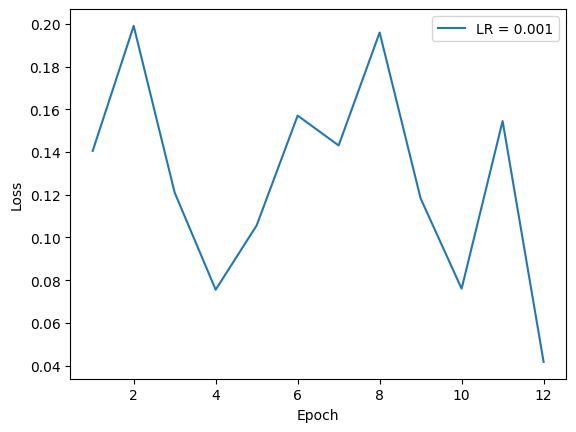


Test Accuracy:
Learning Rate  Accuracy (%)
0.001          97.50%


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784  # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 12
batch_size = 100

# Learning rate and L2 regularization strength
learning_rate = 0.001
weight_decay = 0.001  # L2 regularization strength

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor(),
)

# Data loader
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
)

# Create a list to store the loss for each learning rate
losses_list = []
accuracies_list = []  # To store test accuracies

# ReLU activation function
activation = nn.ReLU()

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.activation = activation  # Use ReLU activation
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.activation(out)  # Apply ReLU activation
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer with L2 regularization
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Train the model
n_total_steps = len(train_loader)
losses = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)

        # Forward pass and loss calculation
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i + 1) % 100 == 0:
            print(
                f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.4f}'
            )

    # Store the loss for the epoch
    losses.append(loss.item())

# Plot the training loss for the single learning rate (0.001)
plt.plot(range(1, num_epochs + 1), losses, label=f'LR = {learning_rate}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    accuracies_list.append(accuracy)

# Display the test accuracy
print("\nTest Accuracy:")
print(f"{'Learning Rate':<15}{'Accuracy (%)'}")
print(f"{learning_rate:<15}{accuracies_list[0]:.2f}%")


##L1 Regularization

Epoch [1/12], Step [100/600], Loss: 1.4685
Epoch [1/12], Step [200/600], Loss: 1.3319
Epoch [1/12], Step [300/600], Loss: 1.1041
Epoch [1/12], Step [400/600], Loss: 1.1827
Epoch [1/12], Step [500/600], Loss: 1.0880
Epoch [1/12], Step [600/600], Loss: 0.9553
Epoch [2/12], Step [100/600], Loss: 0.9161
Epoch [2/12], Step [200/600], Loss: 0.8541
Epoch [2/12], Step [300/600], Loss: 0.9357
Epoch [2/12], Step [400/600], Loss: 0.7845
Epoch [2/12], Step [500/600], Loss: 0.8539
Epoch [2/12], Step [600/600], Loss: 0.8409
Epoch [3/12], Step [100/600], Loss: 0.8136
Epoch [3/12], Step [200/600], Loss: 0.6919
Epoch [3/12], Step [300/600], Loss: 0.7184
Epoch [3/12], Step [400/600], Loss: 0.6995
Epoch [3/12], Step [500/600], Loss: 0.6616
Epoch [3/12], Step [600/600], Loss: 0.8549
Epoch [4/12], Step [100/600], Loss: 0.6775
Epoch [4/12], Step [200/600], Loss: 0.6034
Epoch [4/12], Step [300/600], Loss: 0.6485
Epoch [4/12], Step [400/600], Loss: 0.5905
Epoch [4/12], Step [500/600], Loss: 0.6428
Epoch [4/12

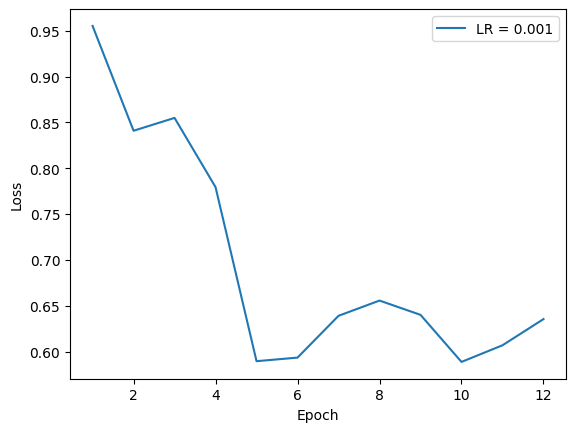


Test Accuracy:
Learning Rate  Accuracy (%)
0.001          93.48%


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Hyper-parameters
input_size = 784  # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 12
batch_size = 100

# Learning rate, L1 regularization, and L2 regularization strengths
learning_rate = 0.001
l1_strength = 0.001  # L1 regularization strength
weight_decay = 0.001  # L2 regularization strength

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor(),
)

# Data loader
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
)

# Create a list to store the loss for each learning rate
losses_list = []
accuracies_list = []  # To store test accuracies

# ReLU activation function
activation = nn.ReLU()

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.activation = activation  # Use ReLU activation
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.activation(out)  # Apply ReLU activation
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer with L1 and L2 regularization
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
    weight_decay=weight_decay,  # L2 regularization
    betas=(0.9, 0.999),  # Default values for Adam optimizer
    amsgrad=False  # Default value for Adam optimizer
)

# Train the model
n_total_steps = len(train_loader)
losses = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)

        # Forward pass and loss calculation
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Calculate L1 regularization term
        l1_reg = torch.tensor(0., requires_grad=True).to(device)
        for param in model.parameters():
            l1_reg += torch.norm(param, p=1)

        # Combine loss with L1 regularization
        loss = loss + l1_strength * l1_reg

        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i + 1) % 100 == 0:
            print(
                f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.4f}'
            )

    # Store the loss for the epoch
    losses.append(loss.item())

# Plot the training loss for the single learning rate (0.001)
plt.plot(range(1, num_epochs + 1), losses, label=f'LR = {learning_rate}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    accuracies_list.append(accuracy)

# Display the test accuracy
print("\nTest Accuracy:")
print(f"{'Learning Rate':<15}{'Accuracy (%)'}")
print(f"{learning_rate:<15}{accuracies_list[0]:.2f}%")


##Adding batch normalization:

Epoch [1/12], Step [100/600], Loss: 0.2925
Epoch [1/12], Step [200/600], Loss: 0.1419
Epoch [1/12], Step [300/600], Loss: 0.1151
Epoch [1/12], Step [400/600], Loss: 0.1487
Epoch [1/12], Step [500/600], Loss: 0.0998
Epoch [1/12], Step [600/600], Loss: 0.0963
Epoch [2/12], Step [100/600], Loss: 0.0952
Epoch [2/12], Step [200/600], Loss: 0.0984
Epoch [2/12], Step [300/600], Loss: 0.0826
Epoch [2/12], Step [400/600], Loss: 0.0952
Epoch [2/12], Step [500/600], Loss: 0.1051
Epoch [2/12], Step [600/600], Loss: 0.0698
Epoch [3/12], Step [100/600], Loss: 0.0605
Epoch [3/12], Step [200/600], Loss: 0.0514
Epoch [3/12], Step [300/600], Loss: 0.1432
Epoch [3/12], Step [400/600], Loss: 0.0167
Epoch [3/12], Step [500/600], Loss: 0.0614
Epoch [3/12], Step [600/600], Loss: 0.0722
Epoch [4/12], Step [100/600], Loss: 0.1068
Epoch [4/12], Step [200/600], Loss: 0.1295
Epoch [4/12], Step [300/600], Loss: 0.0194
Epoch [4/12], Step [400/600], Loss: 0.0325
Epoch [4/12], Step [500/600], Loss: 0.0369
Epoch [4/12

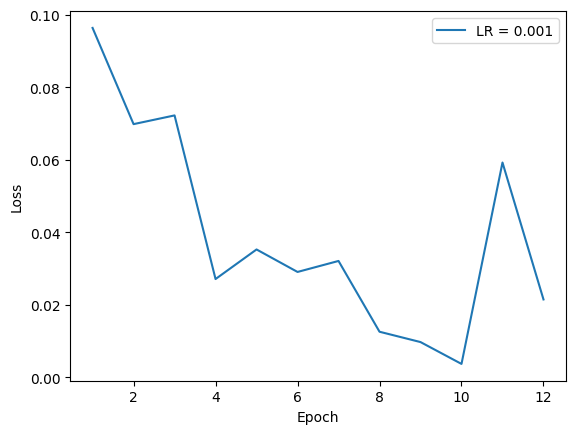


Test Accuracy:
Learning Rate  Accuracy (%)
0.001          97.78%


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784  # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 12
batch_size = 100

# Learning rate and L2 regularization strength
learning_rate = 0.001
weight_decay = 0.001  # L2 regularization strength

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor(),
)

# Data loader
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
)

# Create a list to store the loss for each learning rate
losses_list = []
accuracies_list = []  # To store test accuracies

# ReLU activation function
activation = nn.ReLU()

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)  # Batch normalization
        self.activation = activation  # Use ReLU activation
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.bn1(out)  # Apply batch normalization
        out = self.activation(out)  # Apply ReLU activation
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
n_total_steps = len(train_loader)
losses = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)

        # Forward pass and loss calculation
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i + 1) % 100 == 0:
            print(
                f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.4f}'
            )

    # Store the loss for the epoch
    losses.append(loss.item())

# Plot the training loss for the single learning rate (0.001)
plt.plot(range(1, num_epochs + 1), losses, label=f'LR = {learning_rate}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    accuracies_list.append(accuracy)

# Display the test accuracy
print("\nTest Accuracy:")
print(f"{'Learning Rate':<15}{'Accuracy (%)'}")
print(f"{learning_rate:<15}{accuracies_list[0]:.2f}%")


##Adding layer Normalization

Epoch [1/12], Step [100/600], Loss: 0.1954
Epoch [1/12], Step [200/600], Loss: 0.1330
Epoch [1/12], Step [300/600], Loss: 0.0444
Epoch [1/12], Step [400/600], Loss: 0.1840
Epoch [1/12], Step [500/600], Loss: 0.0731
Epoch [1/12], Step [600/600], Loss: 0.1113
Epoch [2/12], Step [100/600], Loss: 0.0750
Epoch [2/12], Step [200/600], Loss: 0.1096
Epoch [2/12], Step [300/600], Loss: 0.1484
Epoch [2/12], Step [400/600], Loss: 0.0761
Epoch [2/12], Step [500/600], Loss: 0.0898
Epoch [2/12], Step [600/600], Loss: 0.0903
Epoch [3/12], Step [100/600], Loss: 0.0666
Epoch [3/12], Step [200/600], Loss: 0.0394
Epoch [3/12], Step [300/600], Loss: 0.1077
Epoch [3/12], Step [400/600], Loss: 0.0473
Epoch [3/12], Step [500/600], Loss: 0.0373
Epoch [3/12], Step [600/600], Loss: 0.0841
Epoch [4/12], Step [100/600], Loss: 0.0167
Epoch [4/12], Step [200/600], Loss: 0.0212
Epoch [4/12], Step [300/600], Loss: 0.0217
Epoch [4/12], Step [400/600], Loss: 0.0236
Epoch [4/12], Step [500/600], Loss: 0.0465
Epoch [4/12

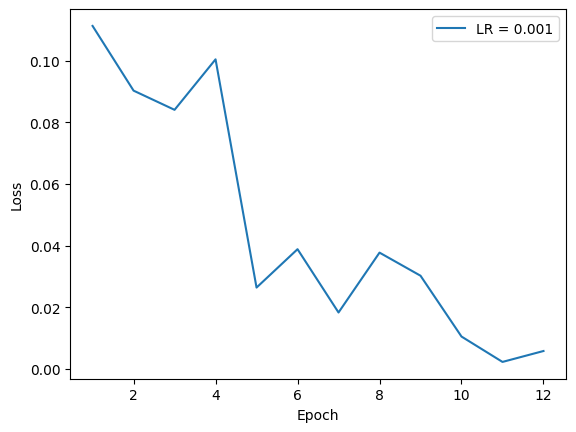


Test Accuracy:
Learning Rate  Accuracy (%)
0.001          98.07%
Training Accuracy: 99.79%


NeuralNet(
  (l1): Linear(in_features=784, out_features=500, bias=True)
  (ln1): LayerNorm((500,), eps=1e-05, elementwise_affine=True)
  (activation): ReLU()
  (l2): Linear(in_features=500, out_features=10, bias=True)
)

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784  # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 12
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor(),
)

# Data loader
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
)

# Create a list to store the loss for each learning rate
losses_list = []
accuracies_list = []  # To store test accuracies

# ReLU activation function
activation = nn.ReLU()

# Fully connected neural network with layer normalization
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.ln1 = nn.LayerNorm(hidden_size)  # Layer normalization
        self.activation = activation
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.ln1(out)  # Apply layer normalization
        out = self.activation(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
n_total_steps = len(train_loader)
losses = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)

        # Forward pass and loss calculation
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i + 1) % 100 == 0:
            print(
                f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.4f}'
            )

    # Store the loss for the epoch
    losses.append(loss.item())

# Plot the training loss for the single learning rate
plt.plot(range(1, num_epochs + 1), losses, label=f'LR = {learning_rate}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    accuracies_list.append(accuracy)

# Display the test accuracy
print("\nTest Accuracy:")
print(f"{'Learning Rate':<15}{'Accuracy (%)'}")
print(f"{learning_rate:<15}{accuracies_list[0]:.2f}%")

 # Training accuracy
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:  # Use train_loader for evaluating the training dataset
            images = images.reshape(-1, 28 * 28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    training_accuracy = 100 * correct / total

print(f'Training Accuracy: {training_accuracy:.2f}%')
model.train()


##**Step 4**:
##Experimientation with Grid CV Search

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score

# Device configuration

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784  # 28x28
num_classes = 10
num_epochs = 5

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor(),
)

# Data loader
batch_size = 100
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
)

# Define the neural network model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

# Flatten input data
def flatten_input(images, labels):
    images = images.reshape(-1, 28 * 28).to(device)
    labels = labels.to(device)
    return images, labels

# Grid of hyperparameters
param_grid = {
    'hidden_size': [500, 300],
    'learning_rate': [0.001, 0.01],
    'batch_size': [100, 200]
}

best_accuracy = 0
best_model = None
best_params = {}

for params in ParameterGrid(param_grid):
    print("Training with hyperparameters:", params)

    model = NeuralNet(input_size, params['hidden_size'], num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=params['learning_rate'])

    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            images, labels = flatten_input(images, labels)
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = flatten_input(images, labels)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print("Test Accuracy: {:.2f}%".format(accuracy))

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params
        best_model = model

print("Best Hyperparameters:", best_params)
print("Best Test Accuracy: {:.2f}%".format(best_accuracy))


Training with hyperparameters: {'batch_size': 100, 'hidden_size': 500, 'learning_rate': 0.001}
Test Accuracy: 97.92%
Training with hyperparameters: {'batch_size': 100, 'hidden_size': 500, 'learning_rate': 0.01}
Test Accuracy: 96.93%
Training with hyperparameters: {'batch_size': 100, 'hidden_size': 300, 'learning_rate': 0.001}
Test Accuracy: 97.81%
Training with hyperparameters: {'batch_size': 100, 'hidden_size': 300, 'learning_rate': 0.01}
Test Accuracy: 97.13%
Training with hyperparameters: {'batch_size': 200, 'hidden_size': 500, 'learning_rate': 0.001}
Test Accuracy: 98.11%
Training with hyperparameters: {'batch_size': 200, 'hidden_size': 500, 'learning_rate': 0.01}
Test Accuracy: 96.85%
Training with hyperparameters: {'batch_size': 200, 'hidden_size': 300, 'learning_rate': 0.001}
Test Accuracy: 97.79%
Training with hyperparameters: {'batch_size': 200, 'hidden_size': 300, 'learning_rate': 0.01}
Test Accuracy: 96.71%
Best Hyperparameters: {'batch_size': 200, 'hidden_size': 500, 'learn

##**Step 5: and 6**

Epoch [1/12], Step [100/480], Loss: 0.2141
Epoch [1/12], Step [200/480], Loss: 0.1679
Epoch [1/12], Step [300/480], Loss: 0.1578
Epoch [1/12], Step [400/480], Loss: 0.1922
Epoch [2/12], Step [100/480], Loss: 0.2332
Epoch [2/12], Step [200/480], Loss: 0.1974
Epoch [2/12], Step [300/480], Loss: 0.1728
Epoch [2/12], Step [400/480], Loss: 0.0612
Epoch [3/12], Step [100/480], Loss: 0.0321
Epoch [3/12], Step [200/480], Loss: 0.1968
Epoch [3/12], Step [300/480], Loss: 0.0644
Epoch [3/12], Step [400/480], Loss: 0.1110
Epoch [4/12], Step [100/480], Loss: 0.0724
Epoch [4/12], Step [200/480], Loss: 0.0306
Epoch [4/12], Step [300/480], Loss: 0.0229
Epoch [4/12], Step [400/480], Loss: 0.0429
Epoch [5/12], Step [100/480], Loss: 0.0231
Epoch [5/12], Step [200/480], Loss: 0.0472
Epoch [5/12], Step [300/480], Loss: 0.0342
Epoch [5/12], Step [400/480], Loss: 0.0961
Epoch [6/12], Step [100/480], Loss: 0.0614
Epoch [6/12], Step [200/480], Loss: 0.0144
Epoch [6/12], Step [300/480], Loss: 0.0114
Epoch [6/12

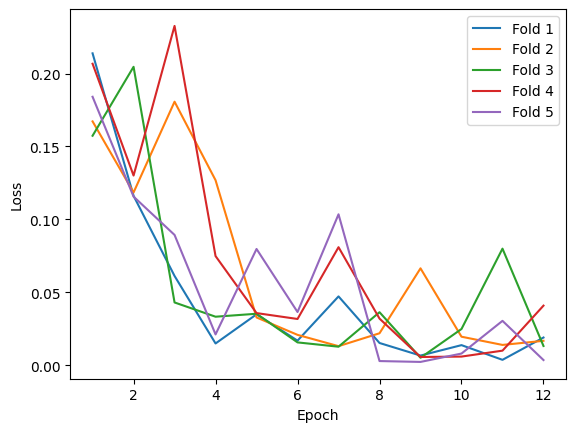

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784  # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 12
batch_size = 100
learning_rate = 0.001

# MNIST dataset
full_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)

# Extract data and labels
data = full_dataset.data.view(-1, 784) / 255.0  # Normalize data
labels = full_dataset.targets

# Create K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Activation function
activation = nn.ReLU()

# Create a list to store the loss for each fold
losses_list = []
models = []  # Initialize a list to store models trained in each fold

# Define a neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.activation = activation
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.activation(out)
        out = self.l2(out)
        return out

# Define a function to train and evaluate the model
def train_and_evaluate(train_data, test_data):
    model = NeuralNet(input_size, hidden_size, num_classes).to(device)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Data loaders
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

    # Train the model
    n_total_steps = len(train_loader)
    losses = []

    best_accuracy = 0  # Track the best accuracy
    best_model_state = None

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        for i, (train_images, train_labels) in enumerate(train_loader):
            test_images, test_labels = next(iter(test_loader))  # Get a batch from the test data

            train_images = train_images.view(-1, 28 * 28).to(device)
            test_images = test_images.view(-1, 28 * 28).to(device)

            train_labels = train_labels.to(device)
            test_labels = test_labels.to(device)

            # Forward pass and loss calculation using both train and test data
            train_outputs = model(train_images)
            test_outputs = model(test_images)

            loss = criterion(train_outputs, train_labels)  # Use train data for loss calculation

            # Backward and optimize
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            if (i + 1) % 100 == 0:
                print(
                    f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.4f}'
                )

        # Store the loss for the epoch
        losses.append(loss.item())

        # Evaluate the model on the test data
        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.view(-1, 28 * 28).to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            accuracy = 100 * correct / total

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model_state = model.state_dict()

    # Restore the best model state
    model.load_state_dict(best_model_state)
    models.append(model)  # Store the trained model

    return best_accuracy, losses

# Perform 5-fold cross-validation
fold_accuracies = []
for train_indices, test_indices in kf.split(data):
    train_data, test_data = torch.utils.data.Subset(full_dataset, train_indices), torch.utils.data.Subset(full_dataset, test_indices)

    accuracy, losses = train_and_evaluate(train_data, test_data)
    fold_accuracies.append(accuracy)
    losses_list.append(losses)

# Calculate the average accuracy
average_accuracy = sum(fold_accuracies) / len(fold_accuracies)

# Report the results
print("Fold Accuracies:", fold_accuracies)
print("Average Accuracy:", average_accuracy)

# Plot the training loss for the ReLU activation function
plt.figure()
for i in range(5):
    plt.plot(range(1, num_epochs + 1), losses_list[i], label=f'Fold {i + 1}')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor(),
)

# Data loader
batch_size = 100
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
)
# Save and load the ensemble model
ensemble_model = NeuralNet(input_size, hidden_size, num_classes).to(device)
ensemble_model_state = ensemble_model.state_dict()

for model_state in [m.state_dict() for m in models]:
    for key in model_state:
        ensemble_model_state[key] += model_state[key]

# Average the ensemble model's weights
for key in ensemble_model_state:
    ensemble_model_state[key] /= len(models)

ensemble_model.load_state_dict(ensemble_model_state)

# Print the weights and parameters of the ensemble model
for name, param in ensemble_model.named_parameters():
    print(f'Parameter name: {name}\nParameter value: {param}\n')

# Evaluate the ensemble model
ensemble_model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.view(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = ensemble_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    ensemble_accuracy = 100 * correct / total

# Report the ensemble model's accuracy
print("Ensemble Model Accuracy:", ensemble_accuracy)


Parameter name: l1.weight
Parameter value: Parameter containing:
tensor([[-0.0142,  0.0113,  0.0063,  ...,  0.0115,  0.0037, -0.0125],
        [-0.0079,  0.0085, -0.0012,  ...,  0.0038, -0.0033, -0.0151],
        [-0.0074,  0.0041, -0.0111,  ...,  0.0062, -0.0109,  0.0126],
        ...,
        [-0.0016, -0.0078, -0.0083,  ...,  0.0073, -0.0130, -0.0098],
        [-0.0030, -0.0073, -0.0023,  ..., -0.0131,  0.0122, -0.0070],
        [-0.0037, -0.0036, -0.0010,  ..., -0.0092, -0.0152,  0.0063]],
       requires_grad=True)

Parameter name: l1.bias
Parameter value: Parameter containing:
tensor([ 3.4147e-02,  1.9394e-02,  4.0360e-02,  3.1036e-02,  4.1047e-02,
        -4.7986e-05, -1.1461e-02, -1.5841e-03,  1.7117e-02,  2.0939e-02,
         6.6007e-02, -9.9012e-04,  4.8397e-02,  2.4522e-02,  5.3690e-02,
        -5.3694e-04,  3.2635e-02,  1.8582e-02, -1.7790e-03, -2.5565e-02,
         4.4038e-02, -1.0970e-02,  2.3945e-02, -2.8971e-03,  1.2932e-02,
         3.9699e-02,  9.3427e-02, -1.6978e-02